In [1]:
import zipfile
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
zip_path = "nlp_sentiment/txt_reviews.zip"
extract_path = "nlp_sentiment"
start_time = time.time()
with zipfile.ZipFile(zip_path, "r") as zip_ref:
     zip_ref.extractall(extract_path)
     end_time = time.time()
print('Execution time:',end_time - start_time,"seconds")

Execution time: 343433.3051109314 seconds


In [3]:
import os
import pandas as pd
from tqdm import tqdm

folder_path = "nlp_sentiment/txt_reviews"  # Replace with the path to your folder
files = os.listdir(folder_path)
data = []

with tqdm(total=len(files)) as pbar:
     for file_name in files:
         if file_name.endswith('.txt'):
             file_path = os.path.join(folder_path, file_name)
             with open(file_path, 'r', encoding='utf-8') as file:
                 content = file.read()
                 data.append(content)
         pbar.update(1)

product_id = []
user_id = []
profile_name = []
helpfulness_numerator = []
helpfulness_denominator = []
score = []
time = []
review_summary = []
review_text = []

for file in data:
     lines = file.splitlines()
     product_id.append(lines[0].replace('ProductId:', '').strip())
     user_id.append(lines[1].replace('UserId:', '').strip())
     profile_name.append(lines[2].replace('ProfileName:', '').strip())
     helpfulness_numerator.append(lines[3].replace('HelpfulnessNumerator:', '').strip())
     helpfulness_denominator.append(lines[4].replace('HelpfulnessDenominator:', '').strip())
     score.append(lines[5].replace('Score:', '').strip())
     time.append(lines[6].replace('Time:', '').strip())
     review_summary.append(lines[7].replace('ReviewSummary:', '').strip())
     review_text.append(lines[8].replace('ReviewText:', '').strip())

df = pd.DataFrame({
     'Id': range(1, len(data) + 1),
     'ProductId': product_id,
     'UserId': user_id,
     'ProfileName': profile_name,
     'HelpfulnessNumerator': helpfulness_numerator,
     'HelpfulnessDenominator': helpfulness_denominator,
     'Score': score,
     'Time': time,
     'ReviewSummary': review_summary,
    'ReviewText': review_text})

df.head()


100%|████████████████████████████████████████████████████████████████████████| 568454/568454 [2:06:01<00:00, 75.17it/s]


Id   ProductId          UserId       ProfileName HelpfulnessNumerator  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW        delmartian                    1   
1   2  B00171APVA  A21BT40VZCCYT4     Carol A. Reed                    0   
2   3  B0019CW0HE  A2P6ACFZ8FTNVV  Melissa Benjamin                    0   
3   4  B006F2NYI2  A132DJVI37RB4X         Scottdrum                    2   
4   5  B000P41A28   A82WIMR4RSVLI        Emrose mom                    0   

  HelpfulnessDenominator Score        Time               ReviewSummary  \
0                      1     5  1303862400       Good Quality Dog Food   
1                      0     5  1351209600            Healthy Dog Food   
2                      1     1  1331164800                         Bad   
3                      5     2  1332374400       Not hot, not habanero   
4                      1     4  1337472000  The best weve tried so far   

                                          ReviewText  
0  I have bought several of the Vitality canned d...  
1  This is a very healthy dog food. Good for thei...  
2  I fed this to my Golden Retriever and he hated...  
3  I have to admit, I was a sucker for the large ...  
4  We have a 7 week old... He had gas and constip...

In [4]:
df.to_csv("text_reviews_raw.csv")

# Start from Here

In [ ]:
df1 = pd.read_csv('text_reviews_raw.csv',index_col=0)
df1.head()

In [ ]:
df1['Helpfulness'] = df1['HelpfulnessNumerator'] / df1['HelpfulnessDenominator']

In [8]:
df1.head()

Id   ProductId          UserId       ProfileName  HelpfulnessNumerator  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW        delmartian                     1   
1   2  B00171APVA  A21BT40VZCCYT4     Carol A. Reed                     0   
2   3  B0019CW0HE  A2P6ACFZ8FTNVV  Melissa Benjamin                     0   
3   4  B006F2NYI2  A132DJVI37RB4X         Scottdrum                     2   
4   5  B000P41A28   A82WIMR4RSVLI        Emrose mom                     0   

   HelpfulnessDenominator  Score        Time               ReviewSummary  \
0                       1      5  1303862400       Good Quality Dog Food   
1                       0      5  1351209600            Healthy Dog Food   
2                       1      1  1331164800                         Bad   
3                       5      2  1332374400       Not hot, not habanero   
4                       1      4  1337472000  The best weve tried so far   

                                          ReviewText  Helpfulness  
0  I have bought several of the Vitality canned d...          1.0  
1  This is a very healthy dog food. Good for thei...          NaN  
2  I fed this to my Golden Retriever and he hated...          0.0  
3  I have to admit, I was a sucker for the large ...          0.4  
4  We have a 7 week old... He had gas and constip...          0.0

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568454 entries, 0 to 568453
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      568454 non-null  int64  
 1   ProductId               568454 non-null  object 
 2   UserId                  568454 non-null  object 
 3   ProfileName             568438 non-null  object 
 4   HelpfulnessNumerator    568454 non-null  int64  
 5   HelpfulnessDenominator  568454 non-null  int64  
 6   Score                   568454 non-null  int64  
 7   Time                    568454 non-null  int64  
 8   ReviewSummary           568427 non-null  object 
 9   ReviewText              568454 non-null  object 
 10  Helpfulness             298402 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 52.0+ MB


In [11]:
df1.isnull().sum()

Id                             0
ProductId                      0
UserId                         0
ProfileName                   16
HelpfulnessNumerator           0
HelpfulnessDenominator         0
Score                          0
Time                           0
ReviewSummary                 27
ReviewText                     0
Helpfulness               270052
dtype: int64

In [12]:
df1 = df1.dropna(subset=['ProfileName'])

df1 = df1.dropna(subset=['ReviewSummary'])

df1['Helpfulness'] = df1['Helpfulness'].fillna(0)


In [13]:
df1.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
ReviewSummary             0
ReviewText                0
Helpfulness               0
dtype: int64

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568411 entries, 0 to 568453
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      568411 non-null  int64  
 1   ProductId               568411 non-null  object 
 2   UserId                  568411 non-null  object 
 3   ProfileName             568411 non-null  object 
 4   HelpfulnessNumerator    568411 non-null  int64  
 5   HelpfulnessDenominator  568411 non-null  int64  
 6   Score                   568411 non-null  int64  
 7   Time                    568411 non-null  int64  
 8   ReviewSummary           568411 non-null  object 
 9   ReviewText              568411 non-null  object 
 10  Helpfulness             568411 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 52.0+ MB


In [18]:
df1['Text'] = df1['ReviewSummary']+' '+ df1['ReviewText']

In [19]:
# df1.to_csv('text_reviews_cleaned.csv',index = False)

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\Data Science Innomatics\DS written notes\Machine Learning\ML assignments\text_reviews_cleaned.csv")
df.head()

Id   ProductId          UserId       ProfileName  HelpfulnessNumerator  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW        delmartian                     1   
1   2  B00171APVA  A21BT40VZCCYT4     Carol A. Reed                     0   
2   3  B0019CW0HE  A2P6ACFZ8FTNVV  Melissa Benjamin                     0   
3   4  B006F2NYI2  A132DJVI37RB4X         Scottdrum                     2   
4   5  B000P41A28   A82WIMR4RSVLI        Emrose mom                     0   

   HelpfulnessDenominator  Score        Time               ReviewSummary  \
0                       1      5  1303862400       Good Quality Dog Food   
1                       0      5  1351209600            Healthy Dog Food   
2                       1      1  1331164800                         Bad   
3                       5      2  1332374400       Not hot, not habanero   
4                       1      4  1337472000  The best weve tried so far   

                                          ReviewText  Helpfulness  \
0  I have bought several of the Vitality canned d...          1.0   
1  This is a very healthy dog food. Good for thei...          0.0   
2  I fed this to my Golden Retriever and he hated...          0.0   
3  I have to admit, I was a sucker for the large ...          0.4   
4  We have a 7 week old... He had gas and constip...          0.0   

                                                Text  
0  Good Quality Dog Food I have bought several of...  
1  Healthy Dog Food This is a very healthy dog fo...  
2  Bad I fed this to my Golden Retriever and he h...  
3  Not hot, not habanero I have to admit, I was a...  
4  The best weve tried so far We have a 7 week ol...

In [3]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
ReviewSummary             0
ReviewText                0
Helpfulness               0
Text                      0
dtype: int64

In [4]:
df['Score'].unique()

array([5, 1, 2, 4, 3], dtype=int64)

In [5]:
score = {'1':'highly_negative','2':'negative','3':'neutral','4':'positive','5':'highly_positive'}

df['Score'] = df['Score'].apply(lambda x: score[str(x)])

In [6]:
df.head()

Id   ProductId          UserId       ProfileName  HelpfulnessNumerator  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW        delmartian                     1   
1   2  B00171APVA  A21BT40VZCCYT4     Carol A. Reed                     0   
2   3  B0019CW0HE  A2P6ACFZ8FTNVV  Melissa Benjamin                     0   
3   4  B006F2NYI2  A132DJVI37RB4X         Scottdrum                     2   
4   5  B000P41A28   A82WIMR4RSVLI        Emrose mom                     0   

   HelpfulnessDenominator            Score        Time  \
0                       1  highly_positive  1303862400   
1                       0  highly_positive  1351209600   
2                       1  highly_negative  1331164800   
3                       5         negative  1332374400   
4                       1         positive  1337472000   

                ReviewSummary  \
0       Good Quality Dog Food   
1            Healthy Dog Food   
2                         Bad   
3       Not hot, not habanero   
4  The best weve tried so far   

                                          ReviewText  Helpfulness  \
0  I have bought several of the Vitality canned d...          1.0   
1  This is a very healthy dog food. Good for thei...          0.0   
2  I fed this to my Golden Retriever and he hated...          0.0   
3  I have to admit, I was a sucker for the large ...          0.4   
4  We have a 7 week old... He had gas and constip...          0.0   

                                                Text  
0  Good Quality Dog Food I have bought several of...  
1  Healthy Dog Food This is a very healthy dog fo...  
2  Bad I fed this to my Golden Retriever and he h...  
3  Not hot, not habanero I have to admit, I was a...  
4  The best weve tried so far We have a 7 week ol...

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568411 entries, 0 to 568410
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      568411 non-null  int64  
 1   ProductId               568411 non-null  object 
 2   UserId                  568411 non-null  object 
 3   ProfileName             568411 non-null  object 
 4   HelpfulnessNumerator    568411 non-null  int64  
 5   HelpfulnessDenominator  568411 non-null  int64  
 6   Score                   568411 non-null  object 
 7   Time                    568411 non-null  int64  
 8   ReviewSummary           568411 non-null  object 
 9   ReviewText              568411 non-null  object 
 10  Helpfulness             568411 non-null  float64
 11  Text                    568411 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 52.0+ MB


<AxesSubplot:xlabel='count', ylabel='Score'>

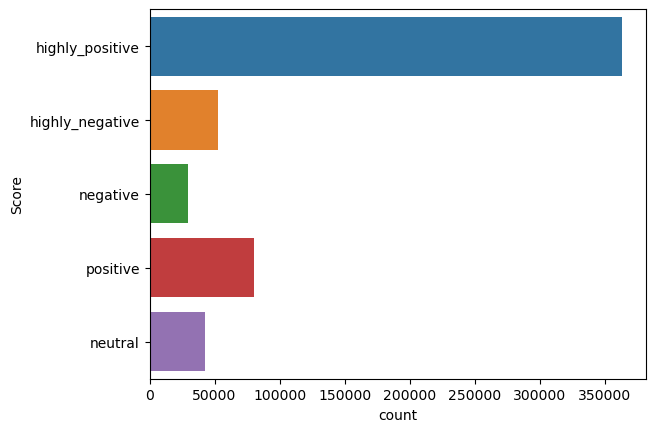

In [11]:
sns.countplot(y = df["Score"])

In [14]:
y = df["Text"]

y.head()

0    Good Quality Dog Food I have bought several of...
1    Healthy Dog Food This is a very healthy dog fo...
2    Bad I fed this to my Golden Retriever and he h...
3    Not hot, not habanero I have to admit, I was a...
4    The best weve tried so far We have a 7 week ol...
Name: Text, dtype: object

In [26]:
score_5_df = df.loc[y == "highly_positive", :]

words = ' '.join(score_5_df['Text'])

cleaned_word = " ".join([word for word in words.split() 
                        if 'subject' not in word])

print(words[:100])


### Identifying Input and Output  variables

In [45]:
X = df[['Text']]
y = df['Score']

### Splitting into train and test data

In [46]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=0)


print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(426308, 1) (426308,)
(142103, 1) (142103,)


### Importing required libraries

In [19]:
import nltk
nltk.download('stopwords')

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [20]:
# Importing libraries required for Text Preprocessing
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [21]:
# initialise the inbuilt Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

### Train Data Preprocessing

In [89]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if t not in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [92]:
from tqdm import tqdm
tqdm.pandas()

temp_X_train_df = X_train.progress_apply(lambda x : preprocess(x, 'lemma'))
temp_X_train_df.columns = ['Text_clean','Text_clean_length_lemma']
temp_X_train_df.head()

100%|████████████████████████████████████████████████████████████████████████| 426308/426308 [4:07:29<00:00, 28.71it/s]


Text_clean  \
121297  really hard set previously bought similar kind...   
508348  convenient meal go gopicnic unique concept por...   
409993  cat love touch would star came chunk rather pa...   
101522  favorite dish absolutely love husband begs mak...   
122287  yummy got rice cake love crunchy snack somewha...   

        Text_clean_length_lemma  
121297                       49  
508348                      219  
409993                       52  
101522                       50  
122287                       25

In [93]:
# temp_X_train_df.to_csv('X_train_preprocess_df.csv')

In [50]:
X_train_df = pd.read_csv(r"C:\Users\hp\Downloads\Data Science Innomatics\DS written notes\Machine Learning\ML assignments\X_train_preprocess_df.csv")
X_train_df.head()

Unnamed: 0                                         Text_clean  \
0      121297  really hard set previously bought similar kind...   
1      508348  convenient meal go gopicnic unique concept por...   
2      409993  cat love touch would star came chunk rather pa...   
3      101522  favorite dish absolutely love husband begs mak...   
4      122287  yummy got rice cake love crunchy snack somewha...   

   Text_clean_length_lemma  
0                       49  
1                      219  
2                       52  
3                       50  
4                       25

In [51]:
X_train_df.shape

(426308, 3)

In [52]:
X_train_df.isnull().sum()

Unnamed: 0                 0
Text_clean                 0
Text_clean_length_lemma    0
dtype: int64

 ### Bag Of Words Representation

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer()

X_train_bow = vocab.fit_transform(X_train_df['Text_clean'])

In [54]:
X_train_bow

<426308x95612 sparse matrix of type '<class 'numpy.int64'>'
	with 14650362 stored elements in Compressed Sparse Row format>

In [55]:
print("Total unique words:", len(vocab.vocabulary_))
print("Type of train features:", type(X_train_bow))
print("Shape of input data:", X_train_bow.shape)

Total unique words: 95612
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (426308, 95612)


In [56]:
import pickle 

In [58]:
filename = "BOW_TECH.sav"
pickle.dump(vocab, open(filename, "wb" ))

In [59]:
# loading saved model 

loaded_model = pickle.load(open("BOW_TECH.sav", "rb"))

In [60]:
loaded_model

CountVectorizer()

### Test Data Preprocessing

In [103]:
# Text Review column
temp_X_test_df = X_test.progress_apply(lambda x : preprocess(x, 'lemma'))
temp_X_test_df.columns = ['Text_clean','Text_clean_length_lemma']

temp_X_test_df.head()

100%|████████████████████████████████████████████████████████████████████████| 142103/142103 [1:13:29<00:00, 32.22it/s]


Text_clean  \
393407  healthy dog food dog storm blue weimaraner mon...   
432093  disgusting aftertaste tried yesterday first ti...   
307824  great cold flu congestion href http www amazon...   
380064  pay shipping fee high quality palatable food o...   
385750  fresh citrus flavor exactly wanted hint citrus...   

        Text_clean_length_lemma  
393407                       44  
432093                       25  
307824                       50  
380064                       58  
385750                       30

In [104]:
# temp_X_test_df.to_csv('X_test_preprocess_df.csv')

In [85]:
X_test_df = pd.read_csv(r"C:\Users\hp\Downloads\Data Science Innomatics\DS written notes\Machine Learning\ML assignments\X_test_preprocess_df.csv")
X_test_df.head()

Unnamed: 0                                         Text_clean  \
0      393407  healthy dog food dog storm blue weimaraner mon...   
1      432093  disgusting aftertaste tried yesterday first ti...   
2      307824  great cold flu congestion href http www amazon...   
3      380064  pay shipping fee high quality palatable food o...   
4      385750  fresh citrus flavor exactly wanted hint citrus...   

   Text_clean_length_lemma  
0                       44  
1                       25  
2                       50  
3                       58  
4                       30

In [86]:
X_test_df.shape

(142103, 3)

In [87]:
X_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142103 entries, 0 to 142102
Data columns (total 3 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Unnamed: 0               142103 non-null  int64 
 1   Text_clean               142102 non-null  object
 2   Text_clean_length_lemma  142103 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.3+ MB


In [88]:
missing_values = X_test_df.isnull().any(axis=1)

records_with_missing_values = X_test_df[missing_values]

print(records_with_missing_values)

       Unnamed: 0 Text_clean  Text_clean_length_lemma
59173      148812        NaN                        0


In [89]:
X_test_df['Text_clean'].fillna("Good Food", inplace=True)

index_to_update = X_test_df[X_test_df['Unnamed: 0'] == 148812].index[0]
X_test_df.at[index_to_update, 'Text_clean_length_lemma'] = 2

In [90]:
X_test_df.isnull().sum()

Unnamed: 0                 0
Text_clean                 0
Text_clean_length_lemma    0
dtype: int64

In [91]:
X_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142103 entries, 0 to 142102
Data columns (total 3 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Unnamed: 0               142103 non-null  int64 
 1   Text_clean               142103 non-null  object
 2   Text_clean_length_lemma  142103 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.3+ MB


In [92]:
X_test_bow = vocab.transform(X_test_df['Text_clean'])

In [93]:
X_test_bow

<142103x95612 sparse matrix of type '<class 'numpy.int64'>'
	with 4867174 stored elements in Compressed Sparse Row format>

In [94]:
print("Total unique words:", len(vocab.vocabulary_))
print("Type of train features:", type(X_test_bow))
print("Shape of input data:", X_test_bow.shape)

Total unique words: 95612
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (142103, 95612)


### Model Building

#### Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression
lr_bow = LogisticRegression()

start_time = time.time()
lr_bow.fit(X_train_bow, y_train)
end_time = time.time()

print('Execution time:',end_time - start_time,"seconds")

Execution time: 82.79972386360168 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [115]:
start_time = time.time()
lr_bow_y_test_pred = lr_bow.predict(X_test_bow)
end_time = time.time()
print('Execution time:',end_time - start_time,"seconds")

Execution time: 0.7311458587646484 seconds


In [116]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, lr_bow_y_test_pred))

print(classification_report(y_test, lr_bow_y_test_pred))

0.7542486787752546
                 precision    recall  f1-score   support

highly_negative       0.68      0.72      0.70     13044
highly_positive       0.82      0.95      0.88     90884
       negative       0.44      0.27      0.33      7397
        neutral       0.48      0.37      0.42     10557
       positive       0.54      0.28      0.37     20221

       accuracy                           0.75    142103
      macro avg       0.59      0.52      0.54    142103
   weighted avg       0.72      0.75      0.73    142103



In [159]:
filename = "lr_bow_model.sav"
pickle.dump(lr_bow, open(filename, "wb" ))

# loading saved model 

loaded_model = pickle.load(open("lr_bow_model.sav", "rb"))

In [160]:
loaded_model

LogisticRegression()

#### K-Nearest Neighbor

In [130]:
from sklearn.neighbors import KNeighborsClassifier
knn_bow = KNeighborsClassifier()

start_time = time.time()
knn_bow.fit(X_train_bow, y_train)
end_time = time.time()

print('Execution time:',end_time - start_time,"seconds")

Execution time: 2.144400119781494 seconds


In [33]:
start_time = time.time()
knn_bow_y_test_pred = knn_bow.predict(X_test_bow)
end_time = time.time()

print('Execution time:',end_time - start_time,"seconds")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Execution time: 4440.513515949249 seconds


In [34]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, knn_bow_y_test_pred))

print(classification_report(y_test, knn_bow_y_test_pred))

0.7233767056290156
                 precision    recall  f1-score   support

highly_negative       0.60      0.43      0.50     13044
highly_positive       0.75      0.94      0.84     90884
       negative       0.59      0.29      0.39      7397
        neutral       0.63      0.29      0.39     10557
       positive       0.64      0.30      0.41     20221

       accuracy                           0.72    142103
      macro avg       0.64      0.45      0.51    142103
   weighted avg       0.70      0.72      0.69    142103



In [131]:
filename = "knn_bow_model.sav"
pickle.dump(knn_bow, open(filename, "wb" ))

# loading saved model 

loaded_model = pickle.load(open("knn_bow_model.sav", "rb"))

In [132]:
loaded_model

KNeighborsClassifier()

#### Decision Tree

In [134]:
from sklearn.tree import DecisionTreeClassifier
dt_bow = DecisionTreeClassifier()

start_time = time.time()
dt_bow.fit(X_train_bow, y_train)
end_time = time.time()

print('Execution time:',end_time - start_time,"seconds")

Execution time: 3277.702634334564 seconds


In [36]:
start_time = time.time()
dt_y_test_pred = dt_bow.predict(X_test_bow)
end_time = time.time()

print('Execution time:',end_time - start_time,"seconds")

Execution time: 0.46577024459838867 seconds


In [37]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, dt_y_test_pred))

print(classification_report(y_test, dt_y_test_pred))

0.7640795760821376
                 precision    recall  f1-score   support

highly_negative       0.67      0.66      0.66     13044
highly_positive       0.85      0.89      0.87     90884
       negative       0.52      0.45      0.49      7397
        neutral       0.54      0.50      0.52     10557
       positive       0.57      0.53      0.55     20221

       accuracy                           0.76    142103
      macro avg       0.63      0.60      0.62    142103
   weighted avg       0.76      0.76      0.76    142103



In [135]:
filename = "dt_bow_model.sav"
pickle.dump(dt_bow, open(filename, "wb" ))

# loading saved model 

loaded_model = pickle.load(open("dt_bow_model.sav", "rb"))

In [136]:
loaded_model

DecisionTreeClassifier()

In [ ]:
# label encoder  for (RAM	RAM_type	Storage)
ram_encoder
ram_type_encoder
storage_encoder

# onehot encoder for (Brand	Processor)
encoder


#### SVC

In [ ]:
from sklearn.svm import SVC

svc_classifier = SVC(kernel='linear', C=1.0)
start_time = time.time()
svc_classifier.fit(X_train_bow, y_train)
end_time = time.time()

print('Execution time:',end_time - start_time,"seconds")

In [ ]:
start_time = time.time()
sv_y_test_pred = svc_classifier.predict(X_test_bow)
end_time = time.time()

print('Execution time:',end_time - start_time,"seconds")

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, sv_y_test_pred))

print(classification_report(y_test, sv_y_test_pred))

### TF-IDF Representation

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_df['Text_clean'])

In [139]:
print("Total unique words:", len(tfidf_vectorizer.vocabulary_))

print("Type of train features:", type(X_train_tfidf))

print("Shape of input data:", X_train_tfidf.shape)

Total unique words: 95612
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (426308, 95612)


In [140]:
X_test_tfidf = tfidf_vectorizer.transform(X_test_df['Text_clean'])

In [141]:
print("Total unique words:", len(tfidf_vectorizer.vocabulary_))
print("Type of train features:", type(X_test_tfidf))
print("Shape of input data:", X_test_tfidf.shape)

Total unique words: 95612
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (142103, 95612)


#### Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression
tf_lr_classifier = LogisticRegression()

start_time = time.time()
tf_lr_classifier.fit(X_train_tfidf, y_train)
end_time = time.time()

print('Execution time:',end_time - start_time,"seconds")

Execution time: 79.89557099342346 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
start_time = time.time()
lr_tf_y_test_pred = tf_lr_classifier.predict(X_test_tfidf)
end_time = time.time()
print('Execution time:',end_time - start_time,"seconds")


Execution time: 0.10171866416931152 seconds


In [44]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, lr_tf_y_test_pred))

print(classification_report(y_test, lr_tf_y_test_pred))

0.7538968213197469
                 precision    recall  f1-score   support

highly_negative       0.67      0.74      0.70     13044
highly_positive       0.81      0.95      0.88     90884
       negative       0.48      0.24      0.32      7397
        neutral       0.49      0.35      0.41     10557
       positive       0.53      0.27      0.35     20221

       accuracy                           0.75    142103
      macro avg       0.60      0.51      0.53    142103
   weighted avg       0.72      0.75      0.72    142103



In [151]:
filename = "tfidf_vectorizer.sav"
pickle.dump(tfidf_vectorizer, open(filename, "wb" ))

# loading saved model 

loaded_model = pickle.load(open("tfidf_vectorizer.sav", "rb"))

In [152]:
loaded_model

TfidfVectorizer()

In [157]:
filename = "lr_tfidf_model.sav"
pickle.dump(tf_lr_classifier, open(filename, "wb" ))

# loading saved model 

loaded_model = pickle.load(open("lr_tfidf_model.sav", "rb"))

In [158]:
loaded_model

LogisticRegression()

#### KNN

In [145]:
from sklearn.neighbors import KNeighborsClassifier
tf_knn_classifier = KNeighborsClassifier()
start_time = time.time()
tf_knn_classifier.fit(X_train_tfidf, y_train)
end_time = time.time()

print('Execution time:',end_time - start_time,"seconds")

Execution time: 0.6450960636138916 seconds


In [46]:
start_time = time.time()
knn_tf_y_test_pred = tf_knn_classifier.predict(X_test_tfidf)
end_time = time.time()

print('Execution time:',end_time - start_time,"seconds")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Execution time: 3453.935166835785 seconds


In [47]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, knn_tf_y_test_pred))

print(classification_report(y_test, knn_tf_y_test_pred))

0.7217159384390196
                 precision    recall  f1-score   support

highly_negative       0.60      0.52      0.56     13044
highly_positive       0.77      0.92      0.84     90884
       negative       0.55      0.30      0.39      7397
        neutral       0.53      0.31      0.39     10557
       positive       0.57      0.33      0.41     20221

       accuracy                           0.72    142103
      macro avg       0.60      0.47      0.52    142103
   weighted avg       0.69      0.72      0.69    142103



In [153]:
filename = "knn_tfidf_model.sav"
pickle.dump(tf_knn_classifier, open(filename, "wb" ))

# loading saved model 

loaded_model = pickle.load(open("knn_tfidf_model.sav", "rb"))

In [154]:
loaded_model

KNeighborsClassifier()

#### Decision Tree

In [148]:
from sklearn.tree import DecisionTreeClassifier
tf_dt_classifier = DecisionTreeClassifier()

start_time = time.time()
tf_dt_classifier.fit(X_train_tfidf, y_train)
end_time = time.time()

print('Execution time:',end_time - start_time,"seconds")

Execution time: 3015.519775390625 seconds


In [49]:
start_time = time.time()
dt_y_test_pred = tf_dt_classifier.predict(X_test_tfidf)
end_time = time.time()

print('Execution time:',end_time - start_time,"seconds")

Execution time: 0.4093332290649414 seconds


In [50]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, dt_y_test_pred))

print(classification_report(y_test, dt_y_test_pred))

0.7546497962745332
                 precision    recall  f1-score   support

highly_negative       0.64      0.65      0.64     13044
highly_positive       0.85      0.87      0.86     90884
       negative       0.51      0.45      0.48      7397
        neutral       0.54      0.50      0.52     10557
       positive       0.55      0.53      0.54     20221

       accuracy                           0.75    142103
      macro avg       0.62      0.60      0.61    142103
   weighted avg       0.75      0.75      0.75    142103



In [155]:
filename = "dt_tfidf_model.sav"
pickle.dump(tf_dt_classifier, open(filename, "wb" ))

# loading saved model 

loaded_model = pickle.load(open("dt_tfidf_model.sav", "rb"))

In [156]:
loaded_model

DecisionTreeClassifier()

# Pretrained BERT for Sentence Vectors

In [112]:
! pip install -U sentence-transformers

In [66]:
!pip install torch==1.2.0 torchvision==0.4.0 -f


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

-f option requires 1 argument


In [124]:
from sentence_transformers import SentenceTransformer

bert_model = SentenceTransformer('all-MiniLM-L6-v2')

In [125]:
bert_model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

In [126]:
X_train_df.head()

Unnamed: 0                                         Text_clean  \
0      121297  really hard set previously bought similar kind...   
1      508348  convenient meal go gopicnic unique concept por...   
2      409993  cat love touch would star came chunk rather pa...   
3      101522  favorite dish absolutely love husband begs mak...   
4      122287  yummy got rice cake love crunchy snack somewha...   

   Text_clean_length_lemma                         doc_vector_pretrained_bert  
0                       49  [0.024452282, -0.05330643, -0.0046030176, 0.00...  
1                      219  [-0.045905873, -0.0529596, 0.06644072, 0.06838...  
2                       52  [-0.047427613, -0.038944155, 0.09158749, 0.029...  
3                       50  [-0.14632924, -0.022014868, 0.057275496, 0.085...  
4                       25  [-0.090858124, 0.00043681162, 0.064715356, 0.0...

In [127]:
X_train_df.drop(columns = ["Unnamed: 0"]).head()

Text_clean  Text_clean_length_lemma  \
0  really hard set previously bought similar kind...                       49   
1  convenient meal go gopicnic unique concept por...                      219   
2  cat love touch would star came chunk rather pa...                       52   
3  favorite dish absolutely love husband begs mak...                       50   
4  yummy got rice cake love crunchy snack somewha...                       25   

                          doc_vector_pretrained_bert  
0  [0.024452282, -0.05330643, -0.0046030176, 0.00...  
1  [-0.045905873, -0.0529596, 0.06644072, 0.06838...  
2  [-0.047427613, -0.038944155, 0.09158749, 0.029...  
3  [-0.14632924, -0.022014868, 0.057275496, 0.085...  
4  [-0.090858124, 0.00043681162, 0.064715356, 0.0...

In [128]:
from tqdm import tqdm
tqdm.pandas()

In [79]:
X_train_df['doc_vector_pretrained_bert'] = X_train_df.Text_clean.progress_apply(bert_model.encode)

X_train_df.head()

100%|████████████████████████████████████████████████████████████████████████| 426308/426308 [4:12:21<00:00, 28.16it/s]


Unnamed: 0                                         Text_clean  \
0      121297  really hard set previously bought similar kind...   
1      508348  convenient meal go gopicnic unique concept por...   
2      409993  cat love touch would star came chunk rather pa...   
3      101522  favorite dish absolutely love husband begs mak...   
4      122287  yummy got rice cake love crunchy snack somewha...   

   Text_clean_length_lemma                         doc_vector_pretrained_bert  
0                       49  [0.024452282, -0.05330643, -0.0046030176, 0.00...  
1                      219  [-0.045905873, -0.0529596, 0.06644072, 0.06838...  
2                       52  [-0.047427613, -0.038944155, 0.09158749, 0.029...  
3                       50  [-0.14632924, -0.022014868, 0.057275496, 0.085...  
4                       25  [-0.090858124, 0.00043681162, 0.064715356, 0.0...

In [80]:
#X_train_df.to_csv(r"bert_X_train.csv")

In [80]:
X_train_bert_pretrained = list(X_train_df.doc_vector_pretrained_bert)

In [81]:
#X_train_bert_pretrained

In [95]:
X_test_df.head()

Unnamed: 0                                         Text_clean  \
0      393407  healthy dog food dog storm blue weimaraner mon...   
1      432093  disgusting aftertaste tried yesterday first ti...   
2      307824  great cold flu congestion href http www amazon...   
3      380064  pay shipping fee high quality palatable food o...   
4      385750  fresh citrus flavor exactly wanted hint citrus...   

   Text_clean_length_lemma  
0                       44  
1                       25  
2                       50  
3                       58  
4                       30

In [96]:
X_test_df['doc_vector_pretrained_bert'] = X_test_df.Text_clean.progress_apply(bert_model.encode)

100%|████████████████████████████████████████████████████████████████████████| 142103/142103 [1:27:47<00:00, 26.97it/s]


In [97]:
X_test_df.head()

Unnamed: 0                                         Text_clean  \
0      393407  healthy dog food dog storm blue weimaraner mon...   
1      432093  disgusting aftertaste tried yesterday first ti...   
2      307824  great cold flu congestion href http www amazon...   
3      380064  pay shipping fee high quality palatable food o...   
4      385750  fresh citrus flavor exactly wanted hint citrus...   

   Text_clean_length_lemma                         doc_vector_pretrained_bert  
0                       44  [0.004024772, -0.0474597, 0.079153836, 0.04446...  
1                       25  [0.0527517, -0.11264435, 0.05011536, 0.0368539...  
2                       50  [-0.079494566, -7.74327e-05, 0.0773089, 0.0135...  
3                       58  [-0.0315705, -0.031514846, 0.105829164, 0.0338...  
4                       30  [-0.10447074, -0.07094701, 0.067890555, 0.0628...

In [98]:
X_test_bert_pretrained = list(X_test_df.doc_vector_pretrained_bert)

In [99]:
from sklearn.linear_model import LogisticRegression
bt_lr_classifier = LogisticRegression()


start_time = time.time()
bt_lr_classifier.fit(X_train_bert_pretrained, y_train)
end_time = time.time()

print('Execution time:',end_time - start_time,"seconds")

Execution time: 77.5569486618042 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
start_time = time.time()
y_test_pred = bt_lr_classifier.predict(X_test_bert_pretrained)
end_time = time.time()
print('Execution time:',end_time - start_time,"seconds")

Execution time: 1.4486024379730225 seconds


In [101]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.7037360224625799
                 precision    recall  f1-score   support

highly_negative       0.57      0.63      0.60     13044
highly_positive       0.76      0.96      0.84     90884
       negative       0.36      0.08      0.14      7397
        neutral       0.36      0.18      0.24     10557
       positive       0.41      0.12      0.18     20221

       accuracy                           0.70    142103
      macro avg       0.49      0.39      0.40    142103
   weighted avg       0.64      0.70      0.65    142103



In [102]:
from sklearn.neighbors import KNeighborsClassifier
bt_knn_classifier = KNeighborsClassifier()
start_time = time.time()
bt_knn_classifier.fit(X_train_bert_pretrained, y_train)
end_time = time.time()

print('Execution time:',end_time - start_time,"seconds")

Execution time: 1.3621468544006348 seconds


In [103]:
start_time = time.time()
knn_bt_y_test_pred = bt_knn_classifier.predict(X_test_bert_pretrained)
end_time = time.time()

print('Execution time:',end_time - start_time,"seconds")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Execution time: 3190.655291557312 seconds


In [104]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, knn_bt_y_test_pred))

print(classification_report(y_test, knn_bt_y_test_pred))

0.736318022842586
                 precision    recall  f1-score   support

highly_negative       0.65      0.60      0.63     13044
highly_positive       0.79      0.93      0.85     90884
       negative       0.54      0.31      0.39      7397
        neutral       0.56      0.31      0.40     10557
       positive       0.54      0.34      0.42     20221

       accuracy                           0.74    142103
      macro avg       0.62      0.50      0.54    142103
   weighted avg       0.71      0.74      0.71    142103



In [105]:
from sklearn.tree import DecisionTreeClassifier
bt_dt_classifier = DecisionTreeClassifier()


start_time = time.time()
bt_dt_classifier.fit(X_train_bert_pretrained, y_train)
end_time = time.time()

print('Execution time:',end_time - start_time,"seconds")

Execution time: 977.149765253067 seconds


In [106]:
start_time = time.time()
y_test_pred = bt_dt_classifier.predict(X_test_bert_pretrained)
end_time = time.time()

print('Execution time:',end_time - start_time,"seconds")

Execution time: 5.084385633468628 seconds


In [107]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.6973885139652224
                 precision    recall  f1-score   support

highly_negative       0.55      0.55      0.55     13044
highly_positive       0.83      0.81      0.82     90884
       negative       0.42      0.44      0.43      7397
        neutral       0.43      0.45      0.44     10557
       positive       0.47      0.49      0.48     20221

       accuracy                           0.70    142103
      macro avg       0.54      0.55      0.55    142103
   weighted avg       0.70      0.70      0.70    142103



In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = DecisionTreeClassifier()
classifier.fit(X_train_bert_pretrained, y_train)

y_test_pred = classifier.predict(X_test_bert_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.6970225822114945
                 precision    recall  f1-score   support

highly_negative       0.55      0.55      0.55     13044
highly_positive       0.83      0.81      0.82     90884
       negative       0.42      0.44      0.43      7397
        neutral       0.43      0.45      0.44     10557
       positive       0.47      0.49      0.48     20221

       accuracy                           0.70    142103
      macro avg       0.54      0.55      0.54    142103
   weighted avg       0.70      0.70      0.70    142103



In [110]:
filename = "bert_technic.sav"

pickle.dump(bert_model, open(filename, "wb" ))

# loading saved model 

loaded_model = pickle.load(open("bert_technic.sav", "rb"))

loaded_model  

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

In [120]:
filename = "bert_algo.sav"

pickle.dump(bt_lr_classifier, open(filename, "wb" ))

# loading saved model 

loaded_model = pickle.load(open("bert_algo.sav", "rb"))


loaded_model

LogisticRegression()

In [33]:
bow = pd.read_csv(r"C:\Users\hp\3D Objects\BOW EXCEL FILE.csv")

In [34]:
bow

Type of algorithm   Execution Time (S)  Prediction Time (S)  \
0      K-NN classifier              0.62828           4440.51351   
1   Logistic regression            76.76630              0.13460   
2         Decision Tree          3054.62750              0.46570   
3                   NaN                 NaN                  NaN   
4                   NaN                 NaN                  NaN   
5                   NaN                 NaN                  NaN   
6                   NaN                 NaN                  NaN   
7                   NaN                 NaN                  NaN   
8                   NaN                 NaN                  NaN   
9                   NaN                 NaN                  NaN   
10                  NaN                 NaN                  NaN   
11                  NaN                 NaN                  NaN   

    Accuracy of model   Unnamed: 4  
0               0.7233         NaN  
1               0.7542         NaN  
2               0.7640         NaN  
3                  NaN         NaN  
4                  NaN         NaN  
5                  NaN         NaN  
6                  NaN         NaN  
7                  NaN         NaN  
8                  NaN         NaN  
9                  NaN         NaN  
10                 NaN         NaN  
11                 NaN         NaN

In [35]:
bow.drop(columns = "Unnamed: 4", inplace = True)

In [36]:
bow.dropna(inplace = True)

In [37]:
bow

Type of algorithm   Execution Time (S)  Prediction Time (S)  \
0     K-NN classifier              0.62828           4440.51351   
1  Logistic regression            76.76630              0.13460   
2        Decision Tree          3054.62750              0.46570   

   Accuracy of model   
0              0.7233  
1              0.7542  
2              0.7640

In [31]:
tfidf = pd.read_csv(r"C:\Users\hp\3D Objects\tfidf.csv")

In [32]:
tfidf

Type of algorithm   Execution Time (S)  Prediction Time (S)  \
0     K-NN classifier               0.6204            3453.9351   
1  Logistic regression             66.1819               0.1017   
2        Decision Tree           2849.7080               0.4093   

   Accuracy of model   
0              0.7217  
1              0.7538  
2              0.7546

### WordCloud

In [57]:
!pip install wordcloud

In [17]:
from wordcloud import WordCloud, STOPWORDS

In [59]:
y_train.head()

121297            neutral
508348    highly_positive
409993            neutral
101522    highly_positive
122287           positive
Name: Score, dtype: object

In [60]:
y_train.unique()

array(['neutral', 'highly_positive', 'positive', 'negative',
       'highly_negative'], dtype=object)

In [ ]:
score_1 = X_train_df.loc[y_train == "highly_negative", :]
score_1

words = ' '.join(score_1['Text_clean'])

cleaned_word = " ".join([word for word in words.split() 
                        if 'subject' not in word])

#### Score-5

In [134]:
y_train = pd.Series(y_train.values, index=X_train_df.index)

In [135]:
score_1 = X_train_df.loc[y_train == "highly_negative", :]
score_1

words = ' '.join(score_1['Text_clean'])

cleaned_word = " ".join([word for word in words.split() 
                        if 'subject' not in word])

In [136]:
score_1_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

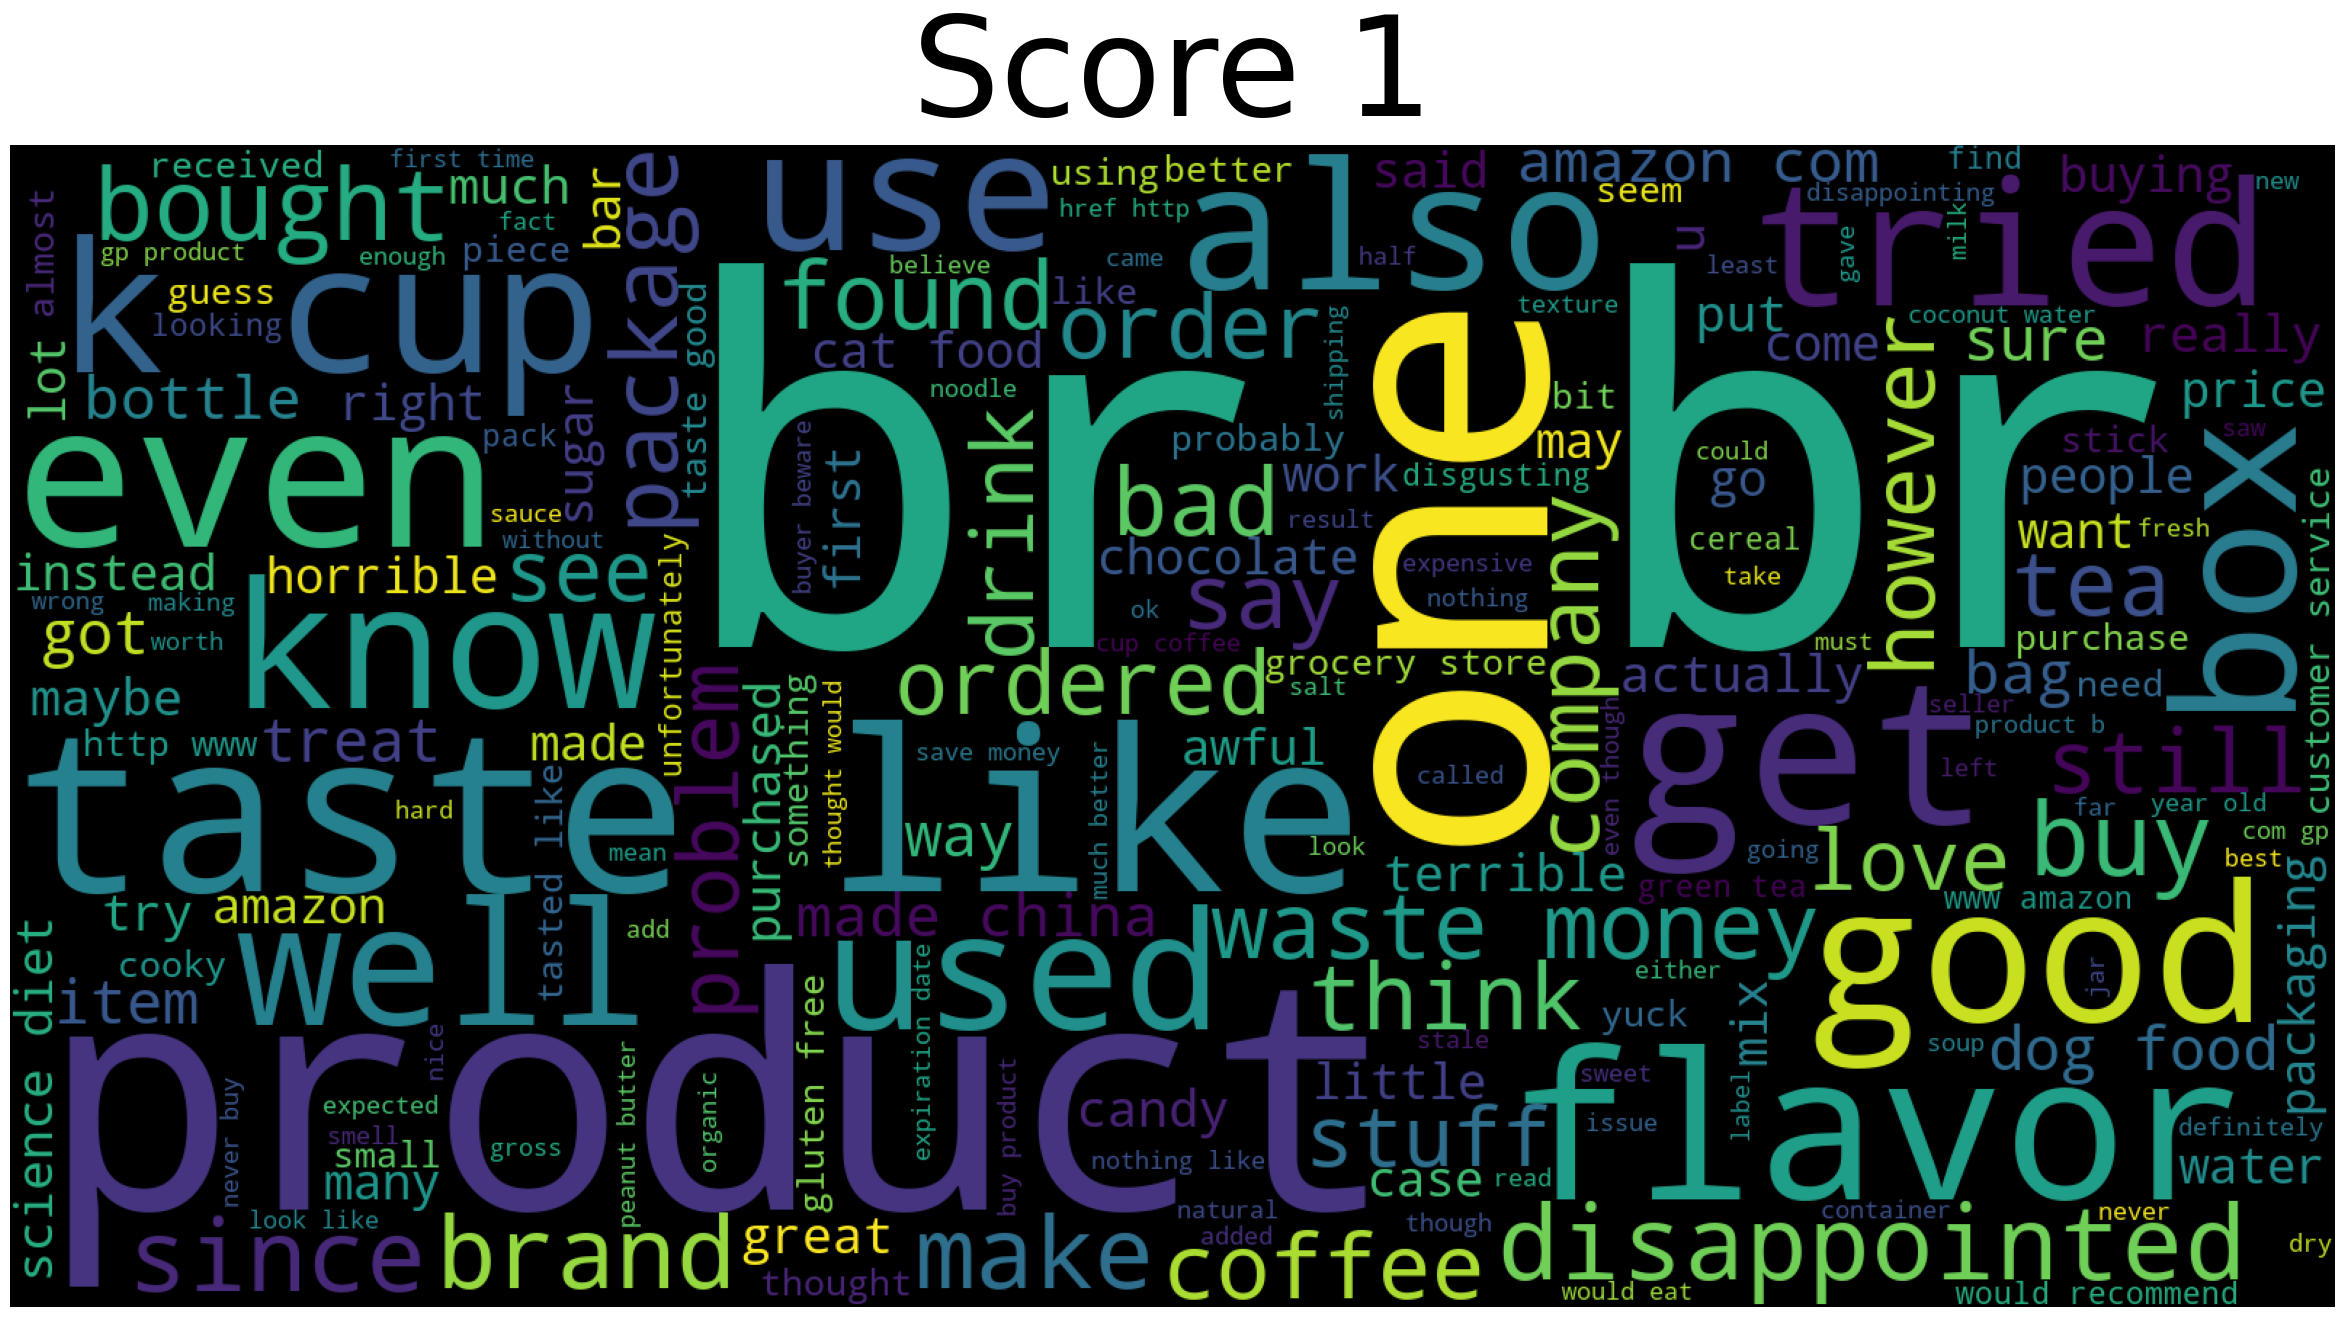

In [137]:
plt.figure(1,figsize=(30,20))
plt.imshow(score_1_wordcloud)
plt.axis('off')
plt.title("Score 1", fontsize = 100)
plt.show()

In [138]:
score_5_df = X_train_df.loc[y_train== "highly_positive", :]

words = ' '.join(score_5_df['Text_clean'])

cleaned_word = " ".join([word for word in words.split() 
                        if 'subject' not in word])

In [139]:
words = ' '.join(score_5_df["Text_clean"])

print(words[:100])

convenient meal go gopicnic unique concept portable food lunch box individually packaged item br br 


In [140]:
score_5_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

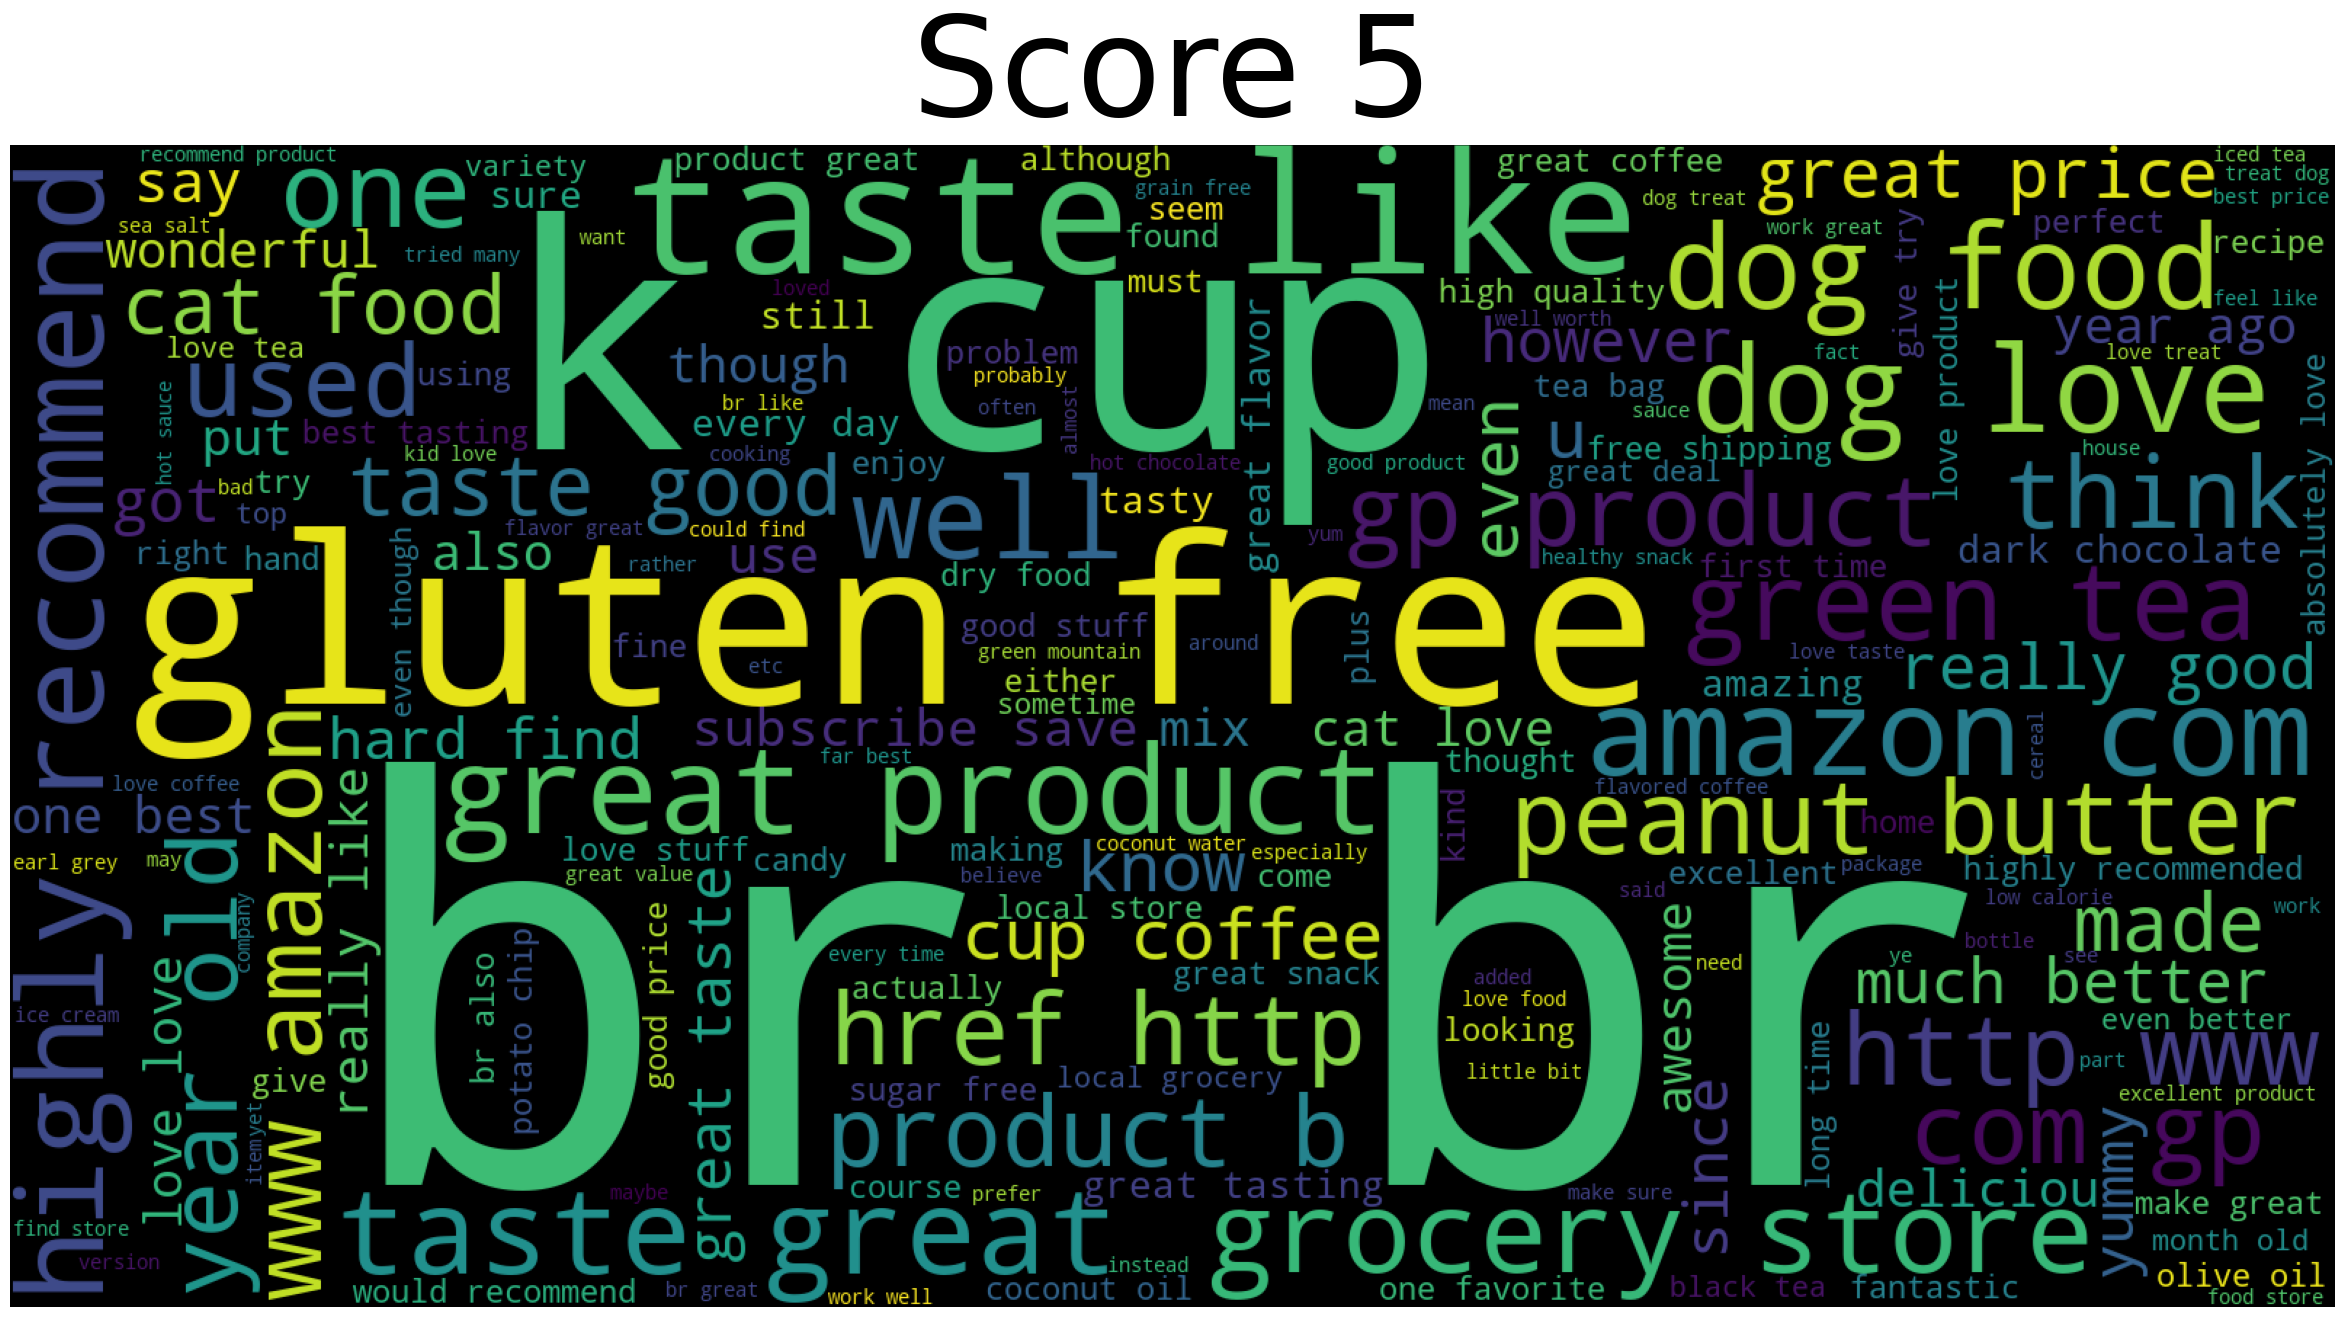

In [141]:
plt.figure(1,figsize=(30,20))
plt.imshow(score_5_wordcloud)
plt.axis('off')
plt.title("Score 5", fontsize = 100)
plt.show()

In [142]:
score_3_df = X_train_df.loc[y_train== "neutral", :]

words = ' '.join(score_3_df['Text_clean'])

cleaned_word = " ".join([word for word in words.split() 
                        if 'subject' not in word])

In [143]:
words = ' '.join(score_3_df['Text_clean'])

print(words[:100])

really hard set previously bought similar kind trap europe effective buy mole bait help needed catch


In [144]:
score_3_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

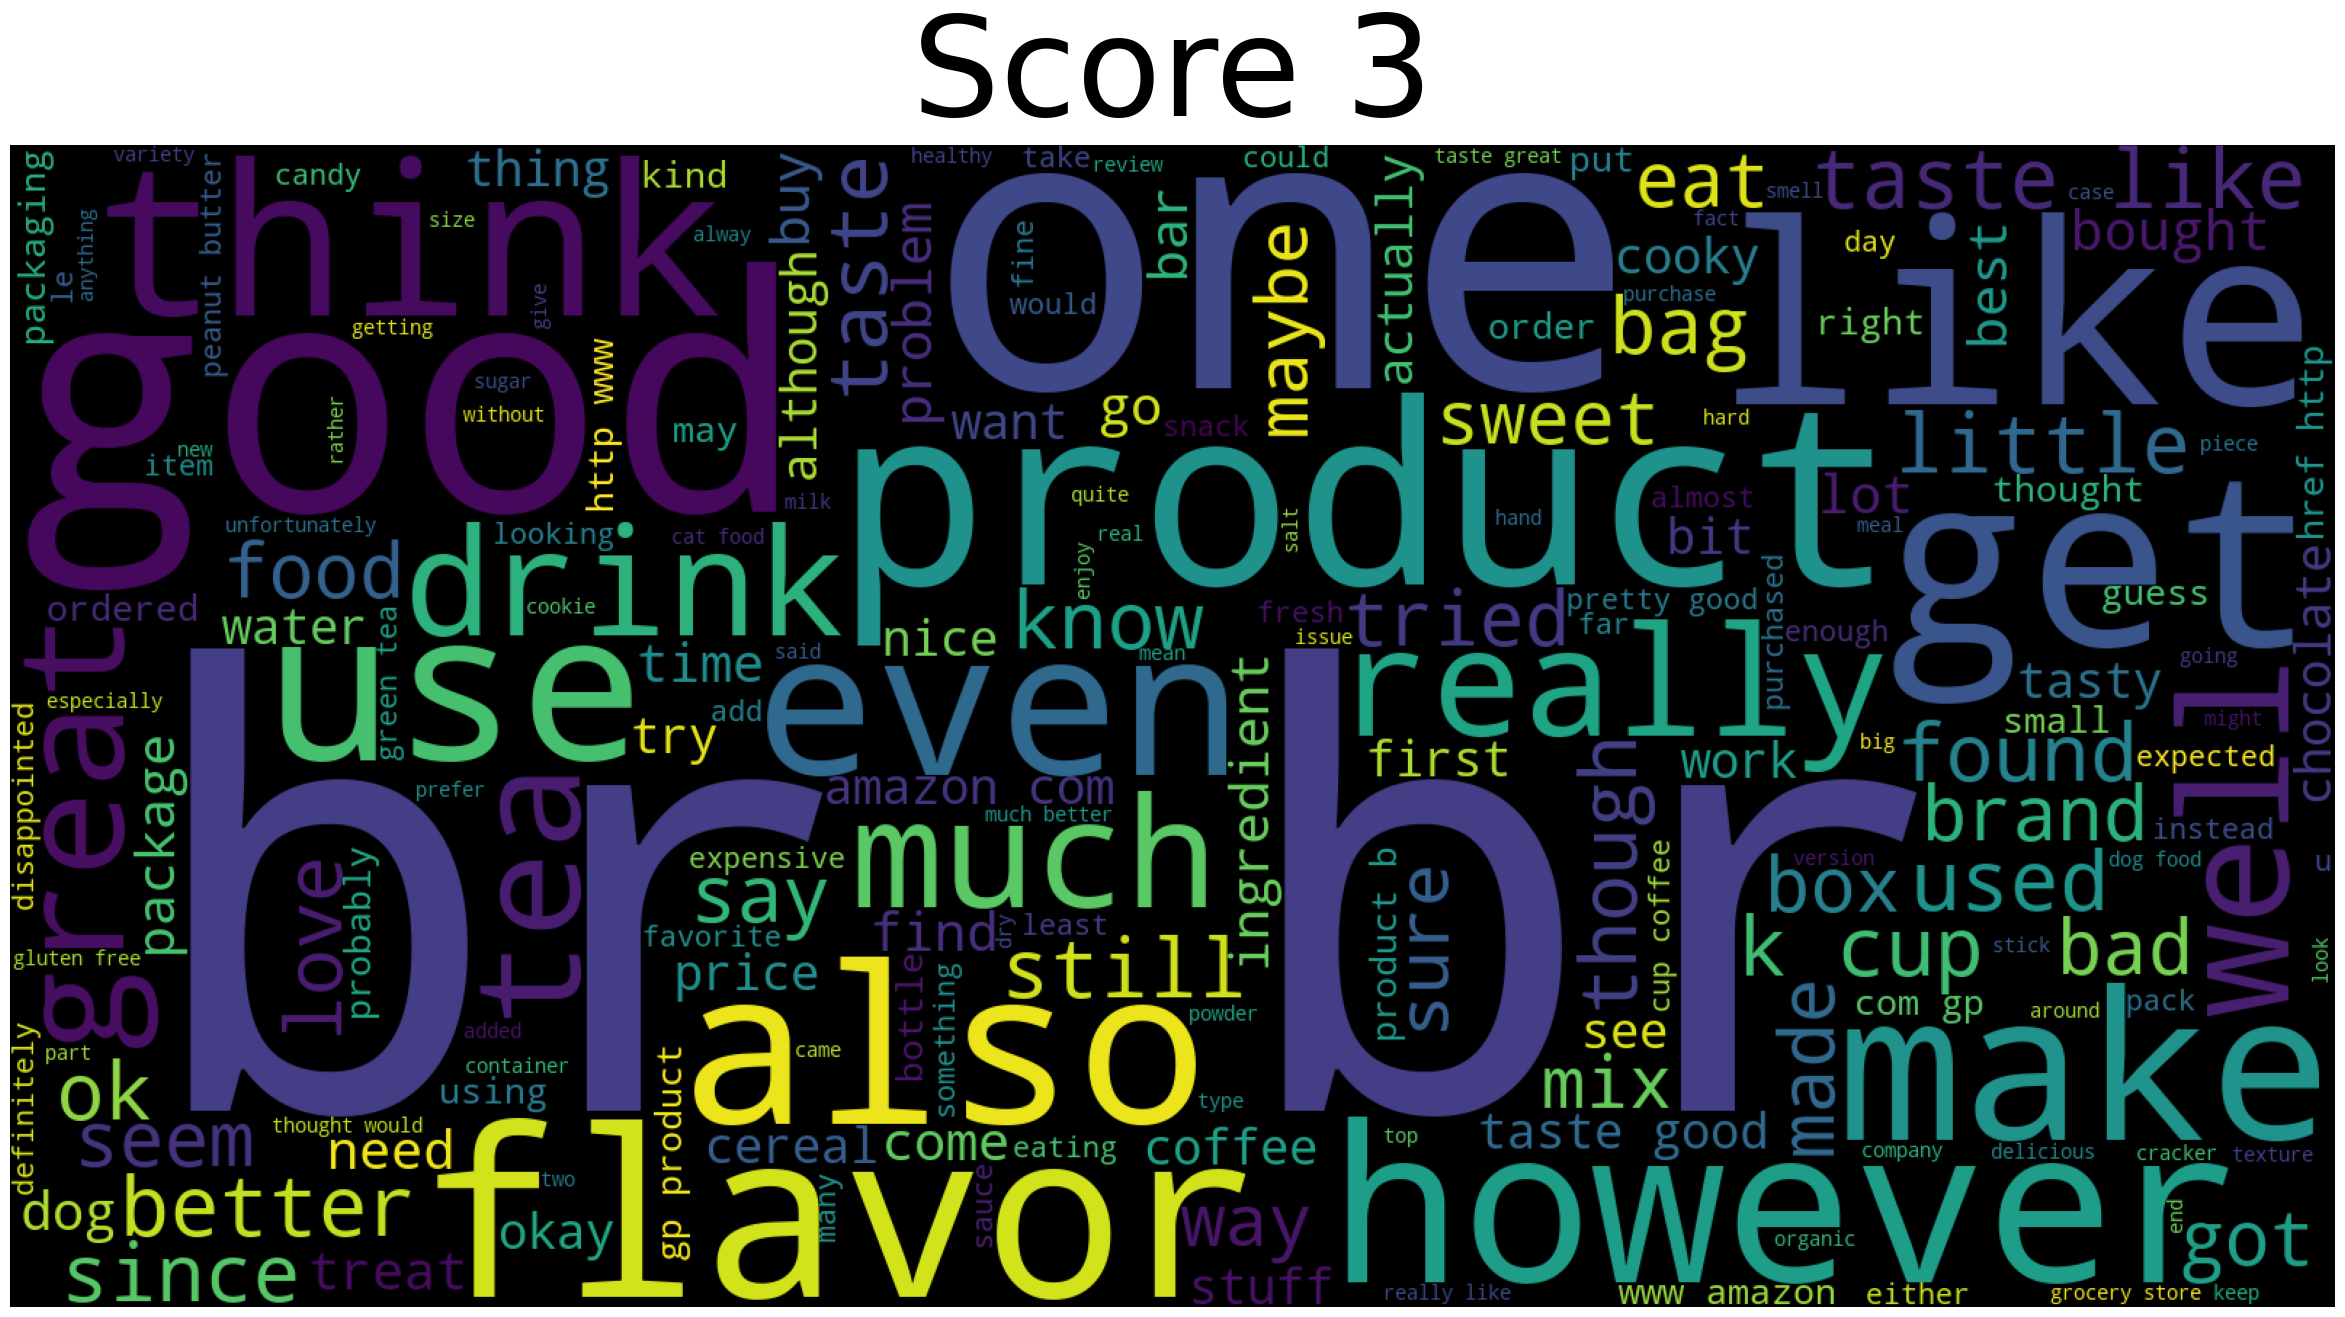

In [145]:
plt.figure(1,figsize=(30,20))
plt.imshow(score_3_wordcloud)
plt.axis('off')
plt.title("Score ", fontsize = 100)
plt.show()

In [146]:
score_4_df = X_train_df.loc[y_train== "positive", :]

words = ' '.join(score_4_df['Text_clean'])

cleaned_word = " ".join([word for word in words.split() 
                        if 'subject' not in word])

In [147]:
words = ' '.join(score_4_df['Text_clean'])

print(words[:100])

yummy got rice cake love crunchy snack somewhat healthy put butter though tasty however expecting sw


In [148]:
score_4_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

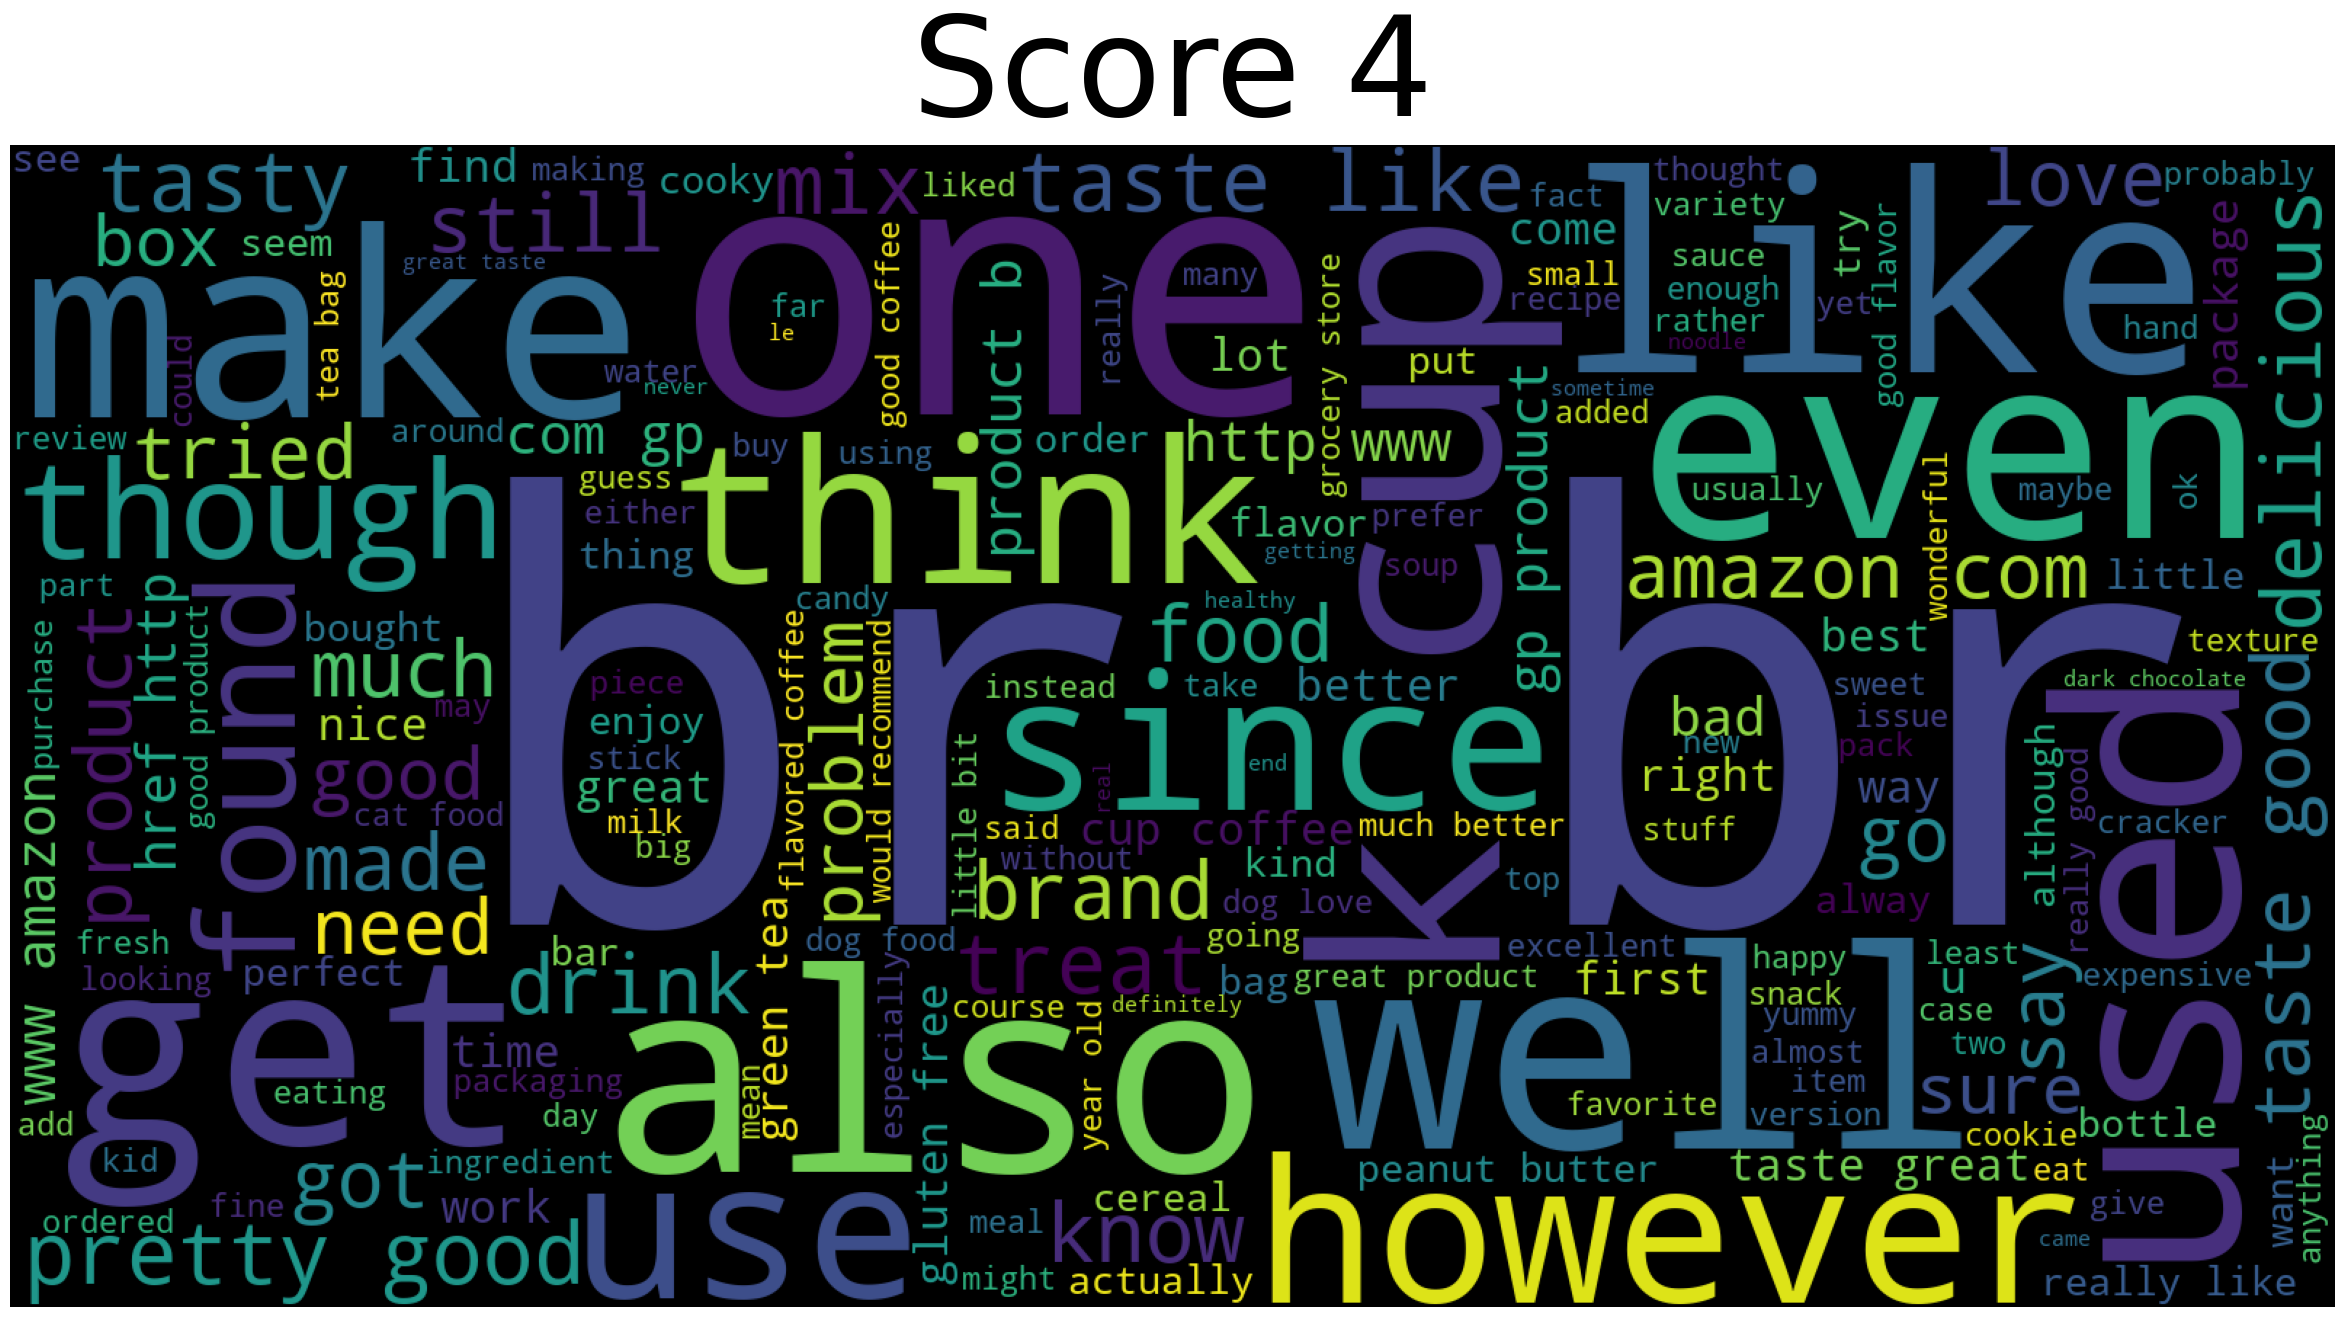

In [149]:
plt.figure(1,figsize=(30,20))
plt.imshow(score_4_wordcloud)
plt.axis('off')
plt.title("Score 4", fontsize = 100)
plt.show()